In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn import preprocessing

In [2]:
#read the csv file
df = pd.read_csv(r'C:\Users\ANIBRATA\Downloads\H2HBABBA2702.csv')
df.shape

(50000, 19)

# STEPS PERFORMED:
1-PREPROCESSING\
2-SPLITTING THE DATASET FOR PREDICTING DELAY\
3-EDA\
4-FEATURE ENGINEERING\
5-PREDICTING THE DELAY USING LINEAR REGRESSOR-rms-7.1\
6-PREDICTING THE DELAY USING DECISION TREE REGRESSOR-rms-7.4\
7-SPLITTING THE DATASET FOR PREDICTING BEHAVIOUR OR AGING BUCKET\
8-CHECKING THE ACCURACY OF THE BEHAVIOUR USING DECISION TREE CLASSIFIER-51%\
9-CHECKING THE ACCURACY OF THE BEHAVIOUR THAT IS CALCULATED USING PREDICTED DELAY-54%

In [3]:
#to display the first five columns 
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR trust,2019-10-25 00:00:00,2019.0,1.929983e+09,2019-10-08,20191008,20191008,20191023.0,USD,RV,1.0,NaN,61898.18,20191008.0,NAH4,1.929983e+09,0
1,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930594e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,NaN,6833.22,20200304.0,NAH4,1.930594e+09,1
2,U001,0200759878,SA foundation,2019-08-02 00:00:00,2019.0,1.929628e+09,2019-07-18,20190717,20190718,20190802.0,USD,RV,1.0,NaN,77421.07,20190718.0,NAH4,1.929628e+09,0
3,U001,0200705742,DOT associates,2019-01-18 00:00:00,2019.0,1.928551e+09,2019-01-03,20190102,20190103,20190206.0,USD,RV,1.0,NaN,3804.65,20190103.0,NAAW,1.928551e+09,0
4,U001,200769623,WAL-MAR trust,2019-06-12 00:00:00,2019.0,1.929408e+09,2019-05-31,20190531,20190531,20190615.0,USD,RV,1.0,NaN,39393.18,20190531.0,NAH4,1.929408e+09,0


In [4]:
df.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
posting_id                0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00004
isOpen                    0.00000
dtype: float64

In [5]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR trust,2019-10-25 00:00:00,2019.0,1.929983e+09,2019-10-08,20191008,20191008,20191023.0,USD,RV,1.0,NaN,61898.18,20191008.0,NAH4,1.929983e+09,0
1,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930594e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,NaN,6833.22,20200304.0,NAH4,1.930594e+09,1
2,U001,0200759878,SA foundation,2019-08-02 00:00:00,2019.0,1.929628e+09,2019-07-18,20190717,20190718,20190802.0,USD,RV,1.0,NaN,77421.07,20190718.0,NAH4,1.929628e+09,0
3,U001,0200705742,DOT associates,2019-01-18 00:00:00,2019.0,1.928551e+09,2019-01-03,20190102,20190103,20190206.0,USD,RV,1.0,NaN,3804.65,20190103.0,NAAW,1.928551e+09,0
4,U001,200769623,WAL-MAR trust,2019-06-12 00:00:00,2019.0,1.929408e+09,2019-05-31,20190531,20190531,20190615.0,USD,RV,1.0,NaN,39393.18,20190531.0,NAH4,1.929408e+09,0


# PREPROCESSING

STEPS:-\
1.REMOVAL OF DUPLICATES\
2.REMOVAL OF CONSTANT COLUMNS\
3.REMOVING THE NULL VALUE AND PUTTING IT TO THE MAIN_TEST DATASET\
4.CREATING A DELAY COLUMN AND DELAY CREATE COLUMN\

In [6]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
      business_code cust_number       name_customer           clear_date  \
815            U001  0200762301           C&S WH in  2019-10-16 00:00:00   
1168           U001   200769623       WAL-MAR trust  2019-03-18 00:00:00   
1449           U001  0200763814  SYSCO F associates                  NaN   
1603           CA02   140106408   WAL-M corporation                  NaN   
1616           U001  0200748108          KROGER llc  2019-06-10 00:00:00   
...             ...         ...                 ...                  ...   
49914          U001  0200759878                 SA   2020-03-16 00:00:00   
49915          U001  0200769623          WAL-MAR us                  NaN   
49945          U001  0200769623     WAL-MAR systems  2019-11-20 00:00:00   
49950          U001  0200769623       WAL-MAR trust  2019-04-16 00:00:00   
49995          U001  0200493614              US  co  2019-09-24 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
815      

In [7]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

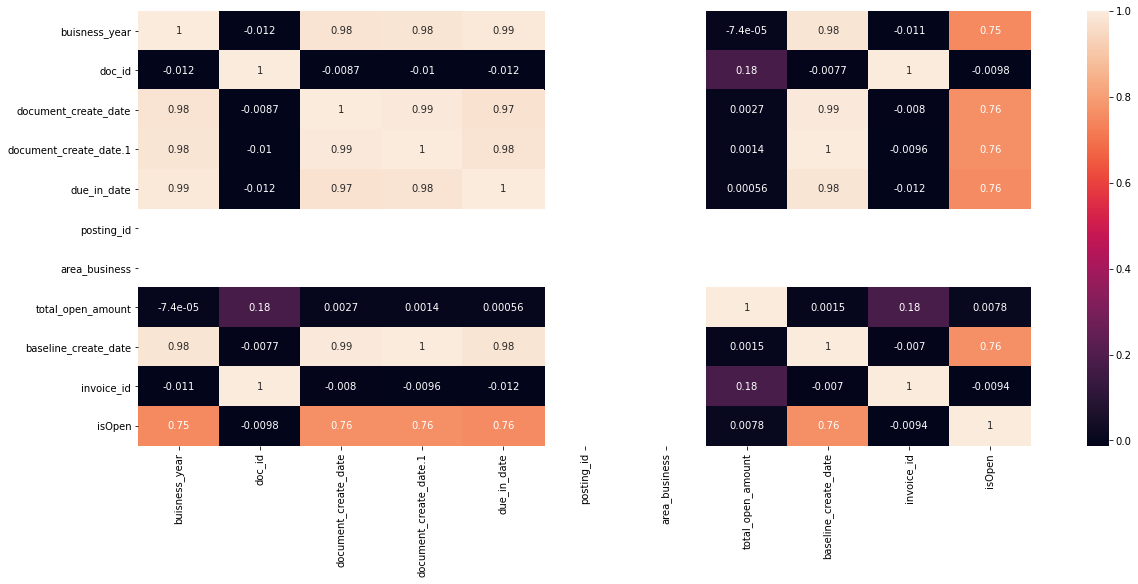

In [8]:
#to check the correlation between columns
#visualisation
corr=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

FROM THIS CORRELATION MAP, We observed that Document_create_id and Document_create_id.1 columns have exactly correlated values,invoice_id and doc_id column have same values for each row ,area_business column have no values and posting_id has constant values. So we will be dropping these four columns

In [9]:
#removal of unwanted columns

#dropping area business as there are null values only
df.drop(['area_business'], axis=1,inplace=True)

#dropping doccument create date as correlation between document create date and document create date is 0.994110
df = df.drop(columns=['document_create_date.1'])

#since there is only 1 value hence it is a constant column, hence droping
df = df.drop(columns=['posting_id'])

df=df.drop(columns=['invoice_id'])

In [10]:
#CONVERSION OF DATE FORMAT TO A UNIVERSAL DATE FORMAT
df['document_create_date']= pd.to_datetime(df.document_create_date, format = '%Y%m%d') 
df['due_in_date']= pd.to_datetime(df.due_in_date, format = '%Y%m%d') 
df['baseline_create_date']= pd.to_datetime(df.baseline_create_date, format = '%Y%m%d')
df['posting_date']= pd.to_datetime(df.posting_date)
df['clear_date']= pd.to_datetime(df.clear_date).dt.normalize()

df = df.rename(columns={'document type': 'document_type'})

In [11]:
#SPLITING THE DATA SET ON THE BASIS OF NULL VALUES 
X_maintrain=df[df['clear_date'].notna()]
X_maintest=df[df['clear_date'].isnull()]

As we observed that the clear_date consist of null values. So we divided the data into two data frames and we will be training the model with X_maintrain dataset

In [12]:
#to check whether our maintrain dataset does not contain any null values
X_maintrain.isnull().mean()

business_code           0.0
cust_number             0.0
name_customer           0.0
clear_date              0.0
buisness_year           0.0
doc_id                  0.0
posting_date            0.0
document_create_date    0.0
due_in_date             0.0
invoice_currency        0.0
document_type           0.0
total_open_amount       0.0
baseline_create_date    0.0
cust_payment_terms      0.0
isOpen                  0.0
dtype: float64

In [13]:
#checking the number of unique values in isOpen
X_maintrain.isOpen.unique()
#as there is only 1 values hence we can drop the column
X_maintrain = X_maintrain.drop(columns=['isOpen'])

In [14]:
#to convert all CAD values to USD conversion rate USD=0.81*CAD
X_maintrain.loc[(X_maintrain.invoice_currency=='CAD'),'total_open_amount']=0.81*X_maintrain.total_open_amount

In [15]:
#to convert the invoice_currency to USD
X_maintrain.loc[(X_maintrain.invoice_currency=='CAD'),'invoice_currency']='USD'

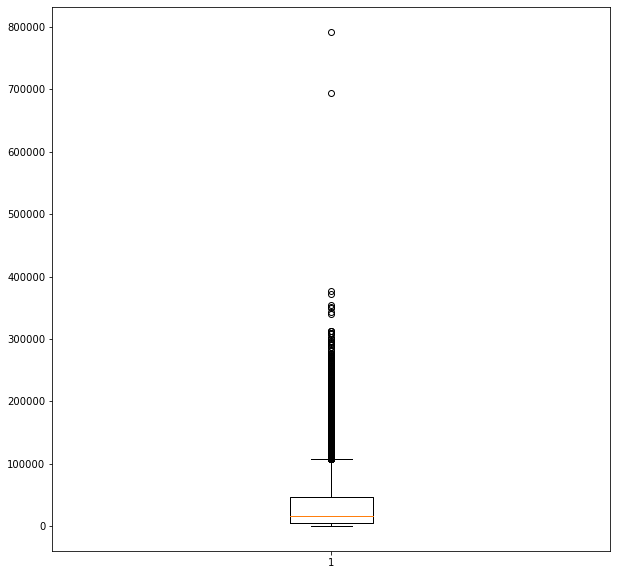

In [16]:
#outlier detection in delay column using boxplot analysis
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 10))
plt.boxplot(X_maintrain.total_open_amount)
plt.show()

In [17]:
#CREATE A DELAY COLUMN WHICH IS A DIFFERENCE OF CLEAR_DATE AND DUE_IN_DATE
X_maintrain["delay"] = X_maintrain["clear_date"] - X_maintrain["due_in_date"]
X_maintrain["delay"] = X_maintrain["delay"].dt.days.astype('int32')
X_maintrain.head()
#CREATE A DELAY_create COLUMN WHICH IS A DIFFERENCE OF due_IN_date AND documet_create_date
X_maintrain["delay_create"] = X_maintrain["due_in_date"] - X_maintrain["document_create_date"]
X_maintrain["delay_create"] = X_maintrain["delay_create"].dt.days.astype('int32')
X_maintrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,delay,delay_create
0,U001,0200769623,WAL-MAR trust,2019-10-25,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,RV,61898.18,2019-10-08,NAH4,2,15
2,U001,0200759878,SA foundation,2019-08-02,2019.0,1.929628e+09,2019-07-18,2019-07-17,2019-08-02,USD,RV,77421.07,2019-07-18,NAH4,0,16
3,U001,0200705742,DOT associates,2019-01-18,2019.0,1.928551e+09,2019-01-03,2019-01-02,2019-02-06,USD,RV,3804.65,2019-01-03,NAAW,-19,35
4,U001,200769623,WAL-MAR trust,2019-06-12,2019.0,1.929408e+09,2019-05-31,2019-05-31,2019-06-15,USD,RV,39393.18,2019-05-31,NAH4,-3,15
5,U001,0200772670,ASSOCIAT systems,2019-10-03,2019.0,1.929884e+09,2019-09-17,2019-09-17,2019-10-02,USD,RV,260.66,2019-09-17,NAU5,1,15


In [18]:
#AGING BUCKET ACCORDING TO DELAY
 
# create a list of our conditions
conditions = [
    (X_maintrain['delay'] < 0),
    (X_maintrain['delay'] ==0),
    (X_maintrain['delay'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
X_maintrain['tier'] = np.select(conditions, values)

# display updated DataFrame
X_maintrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,delay,delay_create,tier
0,U001,0200769623,WAL-MAR trust,2019-10-25,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,USD,RV,61898.18,2019-10-08,NAH4,2,15,2
2,U001,0200759878,SA foundation,2019-08-02,2019.0,1.929628e+09,2019-07-18,2019-07-17,2019-08-02,USD,RV,77421.07,2019-07-18,NAH4,0,16,1
3,U001,0200705742,DOT associates,2019-01-18,2019.0,1.928551e+09,2019-01-03,2019-01-02,2019-02-06,USD,RV,3804.65,2019-01-03,NAAW,-19,35,0
4,U001,200769623,WAL-MAR trust,2019-06-12,2019.0,1.929408e+09,2019-05-31,2019-05-31,2019-06-15,USD,RV,39393.18,2019-05-31,NAH4,-3,15,0
5,U001,0200772670,ASSOCIAT systems,2019-10-03,2019.0,1.929884e+09,2019-09-17,2019-09-17,2019-10-02,USD,RV,260.66,2019-09-17,NAU5,1,15,2


#0:refers that the company has paid early\
#1:refers that the company has paid on time\
#2:refers that the company has paid after the due date

In [19]:
X_maintrain['document_type'].value_counts()

RV    39086
X2        2
Name: document_type, dtype: int64

In [20]:
#The document type is encoded into 0:RV and 1:XF
label = preprocessing.LabelEncoder() 
X_maintrain['document_type_code']= label.fit_transform(X_maintrain['document_type'])

In [21]:
X_maintrain.corr()

,buisness_year,doc_id,total_open_amount,delay,delay_create,document_type_code
buisness_year,1.000000,-0.007010,-0.008943,-0.012307,-0.004371,-0.002773
doc_id,-0.007010,1.000000,0.112855,0.131763,-0.112779,0.190193
total_open_amount,-0.008943,0.112855,1.000000,-0.000093,-0.072548,-0.005233
delay,-0.012307,0.131763,-0.000093,1.000000,-0.189180,0.035285
delay_create,-0.004371,-0.112779,-0.072548,-0.189180,1.000000,-0.016447
document_type_code,-0.002773,0.190193,-0.005233,0.035285,-0.016447,1.000000


from This observation,we get that document_type has no significant correlation with any of these column and most of the values are constant so we can drop it .

In [22]:
#dropping 
X_maintrain =X_maintrain.drop(columns=['document_type'])
X_maintrain =X_maintrain.drop(columns=['document_type_code'])

In [23]:
#sorting the values according to posting-date
X_maintrain=X_maintrain.sort_values('posting_date')

# SPLITTING THE DATASET

In [24]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = X_maintrain.drop(columns=["clear_date", "delay"],axis=1)   

# y --> contains only the target value 
y = X_maintrain['delay']

In [25]:
#splitting the data first into two part -- doing a 80:20 split i.e 20% data fed to intermediate test data set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.2,random_state=0 , shuffle = False)

In [26]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [27]:
X_train.shape , X_val.shape , X_test.shape

((31270, 14), (3909, 14), (3909, 14))

# EDA

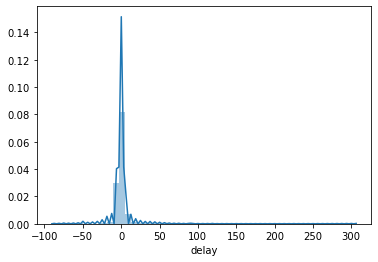

In [28]:
sns.distplot(y_train)

SINCE THIS GRAPH IS SYMMETRICAL,THE MEAN MEDIAN AND MODE LIES NEARBY AND THERE IS NO EFFECT OF OUTLIERS IN DELAY COLUMN

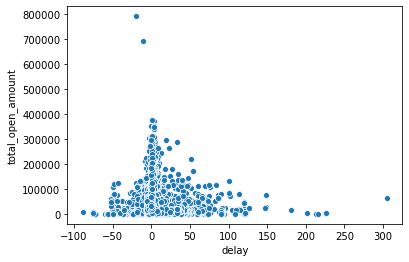

In [29]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

No direct trend observed from this graph

In [30]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_create,tier
16954,U001,0200148860,DOLLA co,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,1285.120,2018-12-30,NAA8,15,1
18962,U001,0200769623,WAL-MAR associates,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,15323.390,2018-12-30,NAH4,15,2
49726,CA02,0140105686,SYSC corp,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-12,USD,6051.672,2019-01-02,CA10,13,2
22271,U001,0200769623,WAL-MAR trust,2019.0,1.928522e+09,2018-12-30,2018-12-31,2019-01-14,USD,16560.320,2018-12-30,NAH4,14,0
40699,U001,0200769623,WAL-MAR systems,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,3424.070,2018-12-30,NAH4,16,0


# FEATURE ENGINEERING

In [31]:
#ENCODING THE BUSINESS CODE USING LABEL ENCODER
label = preprocessing.LabelEncoder() 
X_train['business_code_no']= label.fit_transform(X_train['business_code'])

In [32]:
X_train=X_train.drop(columns=['business_code'])

In [33]:
X_test['business_code_no']= label.fit_transform(X_test['business_code'])
X_test=X_test.drop(columns=['business_code'])
X_val['business_code_no']= label.fit_transform(X_val['business_code'])
X_val=X_val.drop(columns=['business_code'])

In [34]:
X_train['cust_no']= label.fit_transform(X_train['name_customer'])

In [35]:
#DROPPING OFF THE NAME_CUSTOMER AND CUST_NUMBER FEATURES AS IT IS BEEN ENCODED TO CUST_NO. 
X_train=X_train.drop(columns=['name_customer'])
X_train=X_train.drop(columns=['cust_number'])
X_test['cust_no']= label.fit_transform(X_test['name_customer'])
X_test=X_test.drop(columns=['name_customer'])
X_test=X_test.drop(columns=['cust_number'])
X_val['cust_no']= label.fit_transform(X_val['name_customer'])
X_val=X_val.drop(columns=['name_customer'])
X_val=X_val.drop(columns=['cust_number'])

In [36]:
X_train.head()

,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_create,tier,business_code_no,cust_no
16954,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,1285.120,2018-12-30,NAA8,15,1,1,938
18962,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,15323.390,2018-12-30,NAH4,15,2,1,3439
49726,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-12,USD,6051.672,2019-01-02,CA10,13,2,0,3116
22271,2019.0,1.928522e+09,2018-12-30,2018-12-31,2019-01-14,USD,16560.320,2018-12-30,NAH4,14,0,1,3447
40699,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,3424.070,2018-12-30,NAH4,16,0,1,3446


In [37]:
#Date of due date
#0 --> Monday , 6 --> Sunday
X_train['day_of_week'] = X_train['due_in_date'].dt.weekday 
X_val['day_of_week'] = X_val['due_in_date'].dt.weekday 
X_test['day_of_week'] = X_test['due_in_date'].dt.weekday     
#extract day,month and year 

X_train['day_of_duedate'] = X_train['due_in_date'].dt.day
X_train['month_of_duedate'] = X_train['due_in_date'].dt.month
X_train['year_of_duedate'] = X_train['due_in_date'].dt.year

X_val['day_of_duedate'] = X_val['due_in_date'].dt.day
X_val['month_of_duedate'] = X_val['due_in_date'].dt.month
X_val['year_of_duedate'] = X_val['due_in_date'].dt.year


X_test['day_of_duedate'] = X_test['due_in_date'].dt.day
X_test['month_of_duedate'] = X_test['due_in_date'].dt.month
X_test['year_of_duedate'] = X_test['due_in_date'].dt.year

In [38]:
X_train.head()

,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_create,tier,business_code_no,cust_no,day_of_week,day_of_duedate,month_of_duedate,year_of_duedate
16954,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,1285.120,2018-12-30,NAA8,15,1,1,938,0,14,1,2019
18962,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,15323.390,2018-12-30,NAH4,15,2,1,3439,0,14,1,2019
49726,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-12,USD,6051.672,2019-01-02,CA10,13,2,0,3116,5,12,1,2019
22271,2019.0,1.928522e+09,2018-12-30,2018-12-31,2019-01-14,USD,16560.320,2018-12-30,NAH4,14,0,1,3447,0,14,1,2019
40699,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,3424.070,2018-12-30,NAH4,16,0,1,3446,0,14,1,2019


In [39]:
# function will delete a column from train , val and test
def drop_all(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [40]:
X_train ,X_val, X_test = drop_all(['due_in_date'])
X_train ,X_val, X_test = drop_all(['doc_id'])
X_train ,X_val, X_test = drop_all(['baseline_create_date'])

In [41]:
X_train ,X_val, X_test = drop_all(['invoice_currency'])

In [42]:
X_train.head()

,buisness_year,posting_date,document_create_date,total_open_amount,cust_payment_terms,delay_create,tier,business_code_no,cust_no,day_of_week,day_of_duedate,month_of_duedate,year_of_duedate
16954,2019.0,2018-12-30,2018-12-30,1285.120,NAA8,15,1,1,938,0,14,1,2019
18962,2019.0,2018-12-30,2018-12-30,15323.390,NAH4,15,2,1,3439,0,14,1,2019
49726,2019.0,2018-12-30,2018-12-30,6051.672,CA10,13,2,0,3116,5,12,1,2019
22271,2019.0,2018-12-30,2018-12-31,16560.320,NAH4,14,0,1,3447,0,14,1,2019
40699,2019.0,2018-12-30,2018-12-29,3424.070,NAH4,16,0,1,3446,0,14,1,2019


In [43]:
y_train.head()

16954    0
18962    1
49726    5
22271   -4
40699   -5
Name: delay, dtype: int32

In [44]:
X_train['cust_payment_terms_no']= label.fit_transform(X_train['cust_payment_terms'])

In [45]:
X_test['cust_payment_terms_no']= label.fit_transform(X_test['cust_payment_terms'])
X_val['cust_payment_terms_no']= label.fit_transform(X_val['cust_payment_terms'])

In [46]:
X_train ,X_val, X_test = drop_all(['cust_payment_terms'])

In [47]:
X_train.head()

,buisness_year,posting_date,document_create_date,total_open_amount,delay_create,tier,business_code_no,cust_no,day_of_week,day_of_duedate,month_of_duedate,year_of_duedate,cust_payment_terms_no
16954,2019.0,2018-12-30,2018-12-30,1285.120,15,1,1,938,0,14,1,2019,21
18962,2019.0,2018-12-30,2018-12-30,15323.390,15,2,1,3439,0,14,1,2019,34
49726,2019.0,2018-12-30,2018-12-30,6051.672,13,2,0,3116,5,12,1,2019,6
22271,2019.0,2018-12-30,2018-12-31,16560.320,14,0,1,3447,0,14,1,2019,34
40699,2019.0,2018-12-30,2018-12-29,3424.070,16,0,1,3446,0,14,1,2019,34


In [48]:
X_train['business_year_no']= label.fit_transform(X_train['buisness_year'])

In [49]:
X_test['business_year_no']= label.fit_transform(X_test['buisness_year'])
X_val['business_year_no']= label.fit_transform(X_val['buisness_year'])

In [50]:
X_train ,X_val, X_test = drop_all(['buisness_year'])

In [51]:
X_train.head()
X_train.cust_payment_terms_no.value_counts()

21    12486
34     8207
6      2398
26     1069
38      788
      ...  
1         1
45        1
48        1
46        1
62        1
Name: cust_payment_terms_no, Length: 67, dtype: int64

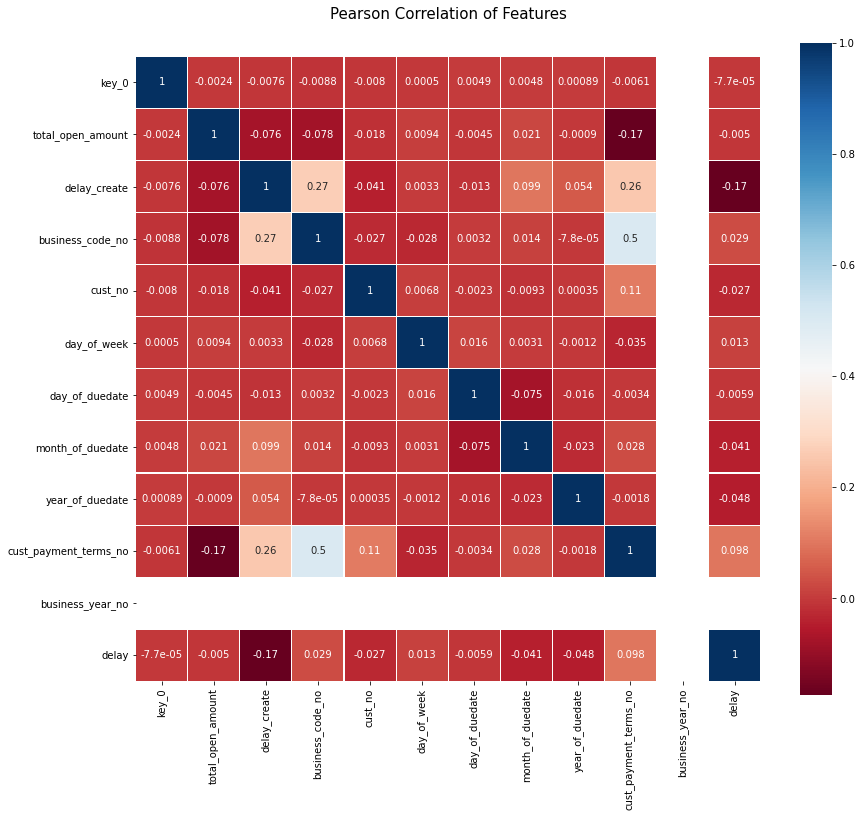

In [52]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

DROPPING OF ALL THE FEATURE WHICH SEEMS TO BE UNNECCESSARY FOR THE MODEL

In [53]:

X_train ,X_val, X_test = drop_all(['posting_date'])
X_train ,X_val, X_test = drop_all(['document_create_date'])
X_train ,X_val, X_test = drop_all(['business_year_no'])
X_train ,X_val, X_test = drop_all(['business_code_no'])
X_train ,X_val, X_test = drop_all(['year_of_duedate'])
X_train ,X_val, X_test = drop_all(['delay_create'])
X_train ,X_val, X_test = drop_all(['tier'])
#CREATING A NEW DATAFRAME FOR PREDICTING TIER
X_class_train=X_train
X_class_val=X_val
X_class_test=X_test

In [54]:
X_train.head()

,total_open_amount,cust_no,day_of_week,day_of_duedate,month_of_duedate,cust_payment_terms_no
16954,1285.120,938,0,14,1,21
18962,15323.390,3439,0,14,1,34
49726,6051.672,3116,5,12,1,6
22271,16560.320,3447,0,14,1,34
40699,3424.070,3446,0,14,1,34


# LINEAR REGRESSOR 

In [55]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
#FITTING THE MODEL
base_model.fit(X_train, y_train)

LinearRegression()

ON VALIDATION SET

In [56]:
y_predict = base_model.predict(X_val)

In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

7.290823528669221

THE MEAN SQUARED ERROR FOR LINEAR REGRESSION MODEL IS 7 DAYS

ON TEST SET

In [58]:
y_predict = base_model.predict(X_test)
mean_squared_error(y_test, y_predict, squared=False)

10.234645214348474

THE RMS VALUE OF TEST SET IS APPROX 10 DAYS AND RMS VALUE OF VALIDATION SET IS APPROX 7 DAYS UNDER LINEAR REGRESSION MODEL.

In [59]:
final_result = base_model.predict(X_test)

In [60]:
final_result = pd.Series(final_result,name='delay')

In [61]:
X_test.reset_index(drop=True,inplace=True)

In [62]:
Final = X_test.merge(final_result , on = X_test.index )
Final 

,key_0,total_open_amount,cust_no,day_of_week,day_of_duedate,month_of_duedate,cust_payment_terms_no,delay
0,0,943.1200,1160,1,28,1,24,1.660171
1,1,41313.4749,249,6,26,1,4,0.600216
2,2,22527.1700,175,1,28,1,17,1.385305
3,3,618.1200,682,1,28,1,12,0.578458
4,4,1329.2300,1163,1,28,1,24,1.660648
...,...,...,...,...,...,...,...,...
3904,3904,106719.1200,918,3,12,3,12,0.984454
3905,3905,1898.9000,1162,3,12,3,24,1.717026
3906,3906,8793.0900,240,4,13,3,14,1.131474
3907,3907,9955.2000,560,3,27,2,40,3.647286


THE DELAY HAS BEEN SUCESSFULLY PREDICTED

# DECISION TREE REGRESSOR

In [63]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [64]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

ON VALIDATION SET

In [65]:
y_predict2 = regressor.predict(X_val)

In [66]:
#RMS VALUE OF val SET
mean_squared_error(y_val, y_predict2, squared=False)

7.232190566442075

THE OBSERVED MEAN SQUARED ERROR FOR THE LINEAR REGRESSION MODEL IS 7 DAYS AND SAME FOR THE DECISION TREE MODEL.SO THIS MODEL CAN BE CONSIDERED

ON TEST SET

In [67]:
y_predict2 = regressor.predict(X_test)

In [68]:
#RMS VALUE OF TEST SET
mean_squared_error(y_test, y_predict2, squared=False)

9.7925474399721

THE RMS VALUE OF TEST SET IS APPROX 9 DAYS AND RMS VALUE OF VALIDATION SET IS APPROX 7 DAYS UNDER DECISION TREE MODEL.

In [69]:
final_result = regressor.predict(X_test)
final_result = pd.Series(final_result,name='delay')
X_test.reset_index(drop=True,inplace=True)
Final1 = X_test.merge(final_result , on = X_test.index )
Final1 

,key_0,total_open_amount,cust_no,day_of_week,day_of_duedate,month_of_duedate,cust_payment_terms_no,delay
0,0,943.1200,1160,1,28,1,24,-0.501503
1,1,41313.4749,249,6,26,1,4,2.646185
2,2,22527.1700,175,1,28,1,17,1.265091
3,3,618.1200,682,1,28,1,12,1.265091
4,4,1329.2300,1163,1,28,1,24,-0.501503
...,...,...,...,...,...,...,...,...
3904,3904,106719.1200,918,3,12,3,12,1.265091
3905,3905,1898.9000,1162,3,12,3,24,-0.501503
3906,3906,8793.0900,240,4,13,3,14,1.265091
3907,3907,9955.2000,560,3,27,2,40,4.761863


THE DELAY HAS BEEN SUCCESSFULLY PREDICTED

In [70]:
#AGING BUCKET ACCORDING TO DELAY COLUMN PREDICTION WHICH WILL BE COMPARED WITH TIER VARIABLE
 
# create a list of our conditions
#0:refers that the company has paid early
#1:refers that the company has paid on time
#2:refers that the company has paid after the due date
conditions = [
    (Final1['delay'] < 0.0),
    (Final1['delay'] ==0.0),
    (Final1['delay'] > 0.0)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
Final1['behaviour'] = np.select(conditions, values)

# display updated DataFrame
Final1.head()

,key_0,total_open_amount,cust_no,day_of_week,day_of_duedate,month_of_duedate,cust_payment_terms_no,delay,behaviour
0,0,943.1200,1160,1,28,1,24,-0.501503,0
1,1,41313.4749,249,6,26,1,4,2.646185,2
2,2,22527.1700,175,1,28,1,17,1.265091,2
3,3,618.1200,682,1,28,1,12,1.265091,2
4,4,1329.2300,1163,1,28,1,24,-0.501503,0


THE ACCURACY OF BEHAVIOUR OR AGING BUCKET OF THE COMPANY IS CALCULATED AT THE END OF THE NOTEBOOK.

# PREDICTING THE BEHAVIOUR OR AGING BUCKET FOR THE MODEL

0:refers that the company has paid early\
1:refers that the company has paid on time\
2:refers that the company has paid after the due date

 SPLITTING THE DATASET TO GET THE TIER AS TARGET VARIABLE

In [71]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = X_maintrain.drop(columns=["clear_date", "delay","tier"],axis=1)   

# y --> contains only the target value 
y = X_maintrain['tier']

In [72]:
#splitting the data first into two part -- doing a 80:20 split i.e 20% data fed to intermediate test data set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.2,random_state=0 , shuffle = False)

In [73]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

PREDICTING THE AGING BUCKET USING DECISION TREE CLASSIFIER

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0 , max_depth=9)

In [75]:
classifier.fit(X_class_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [76]:
y_predict2 = classifier.predict(X_class_val)

In [77]:
final_result = classifier.predict(X_class_val)
final_result = pd.Series(final_result,name='agingbucket_behaviour')
X_class_val.reset_index(drop=True,inplace=True)
Final = X_class_val.merge(final_result , on = X_class_val.index )
Final 

,key_0,total_open_amount,cust_no,day_of_week,day_of_duedate,month_of_duedate,cust_payment_terms_no,agingbucket_behaviour
0,0,16755.9800,611,2,18,12,17,0
1,1,33370.2400,230,1,3,12,10,2
2,2,1837.9000,230,1,3,12,10,2
3,3,36792.1197,932,4,29,11,0,2
4,4,25759.8000,1131,1,3,12,19,0
...,...,...,...,...,...,...,...,...
3904,3904,86524.1800,602,1,28,1,8,2
3905,3905,619.8300,1141,1,28,1,19,0
3906,3906,1898.9000,1139,1,28,1,19,0
3907,3907,5118.1900,1134,1,28,1,19,0


In [78]:
from sklearn.metrics import accuracy_score
y_true=y_val
y_pred=Final['agingbucket_behaviour']
accuracy_score(y_true, y_pred)

0.5055001279099514

THE MACHINE IS GIVING 51% ACCURACY WHEN THE AGING BUCKET IS PREDICTED USING DECISION TREE CLASSIFIER AND THEN COMPARED WITH THE ORIGINAL VALUE

In [79]:
from sklearn.metrics import accuracy_score
y_true=y_test
y_pred=Final1['behaviour']
accuracy_score(y_true, y_pred)

0.5361985162445638

THE MACHINE IS GIVING 54% ACCURACY WHEN THE PREDICTED DELAY IS FIRST CATEGORISED INTO THE BEHAVIOUR TOWARDS PAYMENT OF THE COMPANY AND THEN IT IS COMPARED WITH THE ORIGINAL VALUE.IN THIS THE AGING BUCKET IS NOT CALCULATED USING ANY MACHINE LEARNING MODEL UNLIKE THE ABOVE ONE.

# NOTE:-1)THE AGINGBUCKET_BEHAVIOUR IS CALCULATED USING MACHINE LEARNING MODEL 

# 2)WHEREAS THE BEHAVIOUR IS CALCULATED BY CATEGORISING THE DELAY VALUE PREDICTED ON THE TEST SET

# THE Lost DATA

In [80]:
X_maintest.isnull().mean()

business_code           0.0
cust_number             0.0
name_customer           0.0
clear_date              1.0
buisness_year           0.0
doc_id                  0.0
posting_date            0.0
document_create_date    0.0
due_in_date             0.0
invoice_currency        0.0
document_type           0.0
total_open_amount       0.0
baseline_create_date    0.0
cust_payment_terms      0.0
isOpen                  0.0
dtype: float64

In [81]:
#checking the number of unique values in isOpen
X_maintest.isOpen.unique()
#as there is only 1 values hence we can drop the column
X_maintest = X_maintest.drop(columns=['isOpen'])

In [82]:
X_maintest.loc[(X_maintest.invoice_currency=='CAD'),'total_open_amount']=0.81*X_maintest.total_open_amount

In [83]:
X_maintest.loc[(X_maintest.invoice_currency=='CAD'),'invoice_currency']='USD'

In [84]:
X_main_test = X_maintest.drop(['clear_date'],axis=1)
X_main_test

X_maintest.drop(['clear_date'], inplace =True,axis=1)

In [85]:
X_main_test.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms
1,U001,0200769623,WAL-MAR associates,2020.0,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,RV,6833.22,2020-03-04,NAH4
6,U001,0200762301,C&S WH systems,2020.0,1.930772e+09,2020-04-11,2020-04-10,2020-04-26,USD,RV,58611.77,2020-04-11,NAC6
10,U001,0200769623,WAL-MAR corp,2020.0,1.930831e+09,2020-04-27,2020-04-28,2020-05-12,USD,RV,34766.32,2020-04-27,NAH4
19,U001,0200750051,ALBER trust,2020.0,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,RV,43440.34,2020-03-20,NAA8
21,U001,0200418007,AM us,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-06-10,USD,RV,1765.44,2020-04-06,NAGD


In [86]:
X_main_test['day_of_week'] = X_main_test['due_in_date'].dt.weekday     
#extract day,month and year 

X_main_test['day_of_duedate'] = X_main_test['due_in_date'].dt.day
X_main_test['month_of_duedate'] = X_main_test['due_in_date'].dt.month
X_main_test['year_of_duedate'] = X_main_test['due_in_date'].dt.year
X_main_test.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,day_of_week,day_of_duedate,month_of_duedate,year_of_duedate
1,U001,0200769623,WAL-MAR associates,2020.0,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,RV,6833.22,2020-03-04,NAH4,3,19,3,2020
6,U001,0200762301,C&S WH systems,2020.0,1.930772e+09,2020-04-11,2020-04-10,2020-04-26,USD,RV,58611.77,2020-04-11,NAC6,6,26,4,2020
10,U001,0200769623,WAL-MAR corp,2020.0,1.930831e+09,2020-04-27,2020-04-28,2020-05-12,USD,RV,34766.32,2020-04-27,NAH4,1,12,5,2020
19,U001,0200750051,ALBER trust,2020.0,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,RV,43440.34,2020-03-20,NAA8,5,4,4,2020
21,U001,0200418007,AM us,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-06-10,USD,RV,1765.44,2020-04-06,NAGD,2,10,6,2020


In [87]:
X_main_test['cust_payment_terms_no']= label.fit_transform(X_main_test['cust_payment_terms'])

In [88]:
X_main_test['cust_no']= label.fit_transform(X_main_test['cust_number'])

In [89]:
X_main_test.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,day_of_week,day_of_duedate,month_of_duedate,year_of_duedate,cust_payment_terms_no,cust_no
1,U001,0200769623,WAL-MAR associates,2020.0,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,RV,6833.22,2020-03-04,NAH4,3,19,3,2020,26,392
6,U001,0200762301,C&S WH systems,2020.0,1.930772e+09,2020-04-11,2020-04-10,2020-04-26,USD,RV,58611.77,2020-04-11,NAC6,6,26,4,2020,16,379
10,U001,0200769623,WAL-MAR corp,2020.0,1.930831e+09,2020-04-27,2020-04-28,2020-05-12,USD,RV,34766.32,2020-04-27,NAH4,1,12,5,2020,26,392
19,U001,0200750051,ALBER trust,2020.0,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,RV,43440.34,2020-03-20,NAA8,5,4,4,2020,11,363
21,U001,0200418007,AM us,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-06-10,USD,RV,1765.44,2020-04-06,NAGD,2,10,6,2020,25,229


In [90]:
X_main_test.drop(['cust_number','business_code','name_customer','buisness_year','doc_id','posting_date','document_create_date','due_in_date','invoice_currency','document_type','baseline_create_date','year_of_duedate','cust_payment_terms'],inplace =True ,axis=1)                            



In [91]:
X_main_test.head()

,total_open_amount,day_of_week,day_of_duedate,month_of_duedate,cust_payment_terms_no,cust_no
1,6833.22,3,19,3,26,392
6,58611.77,6,26,4,16,379
10,34766.32,1,12,5,26,392
19,43440.34,5,4,4,11,363
21,1765.44,2,10,6,25,229


In [92]:
final_result = base_model.predict(X_main_test)

In [93]:
final_result = pd.Series(final_result,name='Delay')

In [94]:
X_maintest.reset_index(drop=True,inplace=True)

In [95]:
Final = X_maintest.merge(final_result , on = X_main_test.index )
Final 

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,1,U001,0200769623,WAL-MAR associates,2020.0,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,RV,6833.22,2020-03-04,NAH4,38.621980
1,6,U001,0200762301,C&S WH systems,2020.0,1.930772e+09,2020-04-11,2020-04-10,2020-04-26,USD,RV,58611.77,2020-04-11,NAC6,39.872492
2,10,U001,0200769623,WAL-MAR corp,2020.0,1.930831e+09,2020-04-27,2020-04-28,2020-05-12,USD,RV,34766.32,2020-04-27,NAH4,38.006771
3,19,U001,0200750051,ALBER trust,2020.0,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,RV,43440.34,2020-03-20,NAA8,36.757075
4,21,U001,0200418007,AM us,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-06-10,USD,RV,1765.44,2020-04-06,NAGD,20.708396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,49953,U001,0200991008,REED F associates,2020.0,1.930671e+09,2020-03-20,2020-03-19,2020-03-30,USD,RV,21119.28,2020-03-20,NA10,54.363543
9701,49959,U001,0200353024,DECA trust,2020.0,1.930761e+09,2020-04-08,2020-04-08,2020-04-11,USD,RV,6150.47,2020-04-01,NAM2,18.868876
9702,49966,U001,0200750051,ALBER us,2020.0,1.930671e+09,2020-03-18,2020-03-19,2020-04-02,USD,RV,100307.88,2020-03-18,NAA8,36.791963
9703,49984,U001,0200780383,MEIJ co,2020.0,1.930780e+09,2020-04-13,2020-04-13,2020-04-28,USD,RV,47080.54,2020-04-13,NAA8,44.136867


In [96]:
Final['PredictedPaymentDate'] = pd.to_datetime(Final.due_in_date) + pd.to_timedelta(pd.np.ceil(Final.Delay), unit="D")
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,Delay,PredictedPaymentDate
0,1,U001,0200769623,WAL-MAR associates,2020.0,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,RV,6833.22,2020-03-04,NAH4,38.621980,2020-04-27
1,6,U001,0200762301,C&S WH systems,2020.0,1.930772e+09,2020-04-11,2020-04-10,2020-04-26,USD,RV,58611.77,2020-04-11,NAC6,39.872492,2020-06-05
2,10,U001,0200769623,WAL-MAR corp,2020.0,1.930831e+09,2020-04-27,2020-04-28,2020-05-12,USD,RV,34766.32,2020-04-27,NAH4,38.006771,2020-06-20
3,19,U001,0200750051,ALBER trust,2020.0,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,RV,43440.34,2020-03-20,NAA8,36.757075,2020-05-11
4,21,U001,0200418007,AM us,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-06-10,USD,RV,1765.44,2020-04-06,NAGD,20.708396,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,49953,U001,0200991008,REED F associates,2020.0,1.930671e+09,2020-03-20,2020-03-19,2020-03-30,USD,RV,21119.28,2020-03-20,NA10,54.363543,2020-05-24
9701,49959,U001,0200353024,DECA trust,2020.0,1.930761e+09,2020-04-08,2020-04-08,2020-04-11,USD,RV,6150.47,2020-04-01,NAM2,18.868876,2020-04-30
9702,49966,U001,0200750051,ALBER us,2020.0,1.930671e+09,2020-03-18,2020-03-19,2020-04-02,USD,RV,100307.88,2020-03-18,NAA8,36.791963,2020-05-09
9703,49984,U001,0200780383,MEIJ co,2020.0,1.930780e+09,2020-04-13,2020-04-13,2020-04-28,USD,RV,47080.54,2020-04-13,NAA8,44.136867,2020-06-12


In [97]:
conditions = [
    (Final['Delay'] < 0.0),
    (Final['Delay'] ==0.0),
    (Final['Delay'] > 0.0)
    ]

# create a list of the values we want to assign for each condition
values = ['-1', '0', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
Final['PredictedAgingBucket'] = np.select(conditions, values)

# display updated DataFrame
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,Delay,PredictedPaymentDate,PredictedAgingBucket
0,1,U001,0200769623,WAL-MAR associates,2020.0,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,RV,6833.22,2020-03-04,NAH4,38.621980,2020-04-27,1
1,6,U001,0200762301,C&S WH systems,2020.0,1.930772e+09,2020-04-11,2020-04-10,2020-04-26,USD,RV,58611.77,2020-04-11,NAC6,39.872492,2020-06-05,1
2,10,U001,0200769623,WAL-MAR corp,2020.0,1.930831e+09,2020-04-27,2020-04-28,2020-05-12,USD,RV,34766.32,2020-04-27,NAH4,38.006771,2020-06-20,1
3,19,U001,0200750051,ALBER trust,2020.0,1.930674e+09,2020-03-20,2020-03-20,2020-04-04,USD,RV,43440.34,2020-03-20,NAA8,36.757075,2020-05-11,1
4,21,U001,0200418007,AM us,2020.0,1.930752e+09,2020-04-06,2020-04-06,2020-06-10,USD,RV,1765.44,2020-04-06,NAGD,20.708396,2020-07-01,1


In [98]:
Final.drop(['business_code','buisness_year','key_0','posting_date','document_create_date','invoice_currency','document_type','baseline_create_date','cust_payment_terms','Delay'],inplace =True ,axis=1)                            

In [99]:
Final.head()

,cust_number,name_customer,doc_id,due_in_date,total_open_amount,PredictedPaymentDate,PredictedAgingBucket
0,0200769623,WAL-MAR associates,1.930594e+09,2020-03-19,6833.22,2020-04-27,1
1,0200762301,C&S WH systems,1.930772e+09,2020-04-26,58611.77,2020-06-05,1
2,0200769623,WAL-MAR corp,1.930831e+09,2020-05-12,34766.32,2020-06-20,1
3,0200750051,ALBER trust,1.930674e+09,2020-04-04,43440.34,2020-05-11,1
4,0200418007,AM us,1.930752e+09,2020-06-10,1765.44,2020-07-01,1


In [100]:
Final['notes']='LOREM IPSUM..........'

In [101]:
Final.head()

,cust_number,name_customer,doc_id,due_in_date,total_open_amount,PredictedPaymentDate,PredictedAgingBucket,notes
0,0200769623,WAL-MAR associates,1.930594e+09,2020-03-19,6833.22,2020-04-27,1,LOREM IPSUM..........
1,0200762301,C&S WH systems,1.930772e+09,2020-04-26,58611.77,2020-06-05,1,LOREM IPSUM..........
2,0200769623,WAL-MAR corp,1.930831e+09,2020-05-12,34766.32,2020-06-20,1,LOREM IPSUM..........
3,0200750051,ALBER trust,1.930674e+09,2020-04-04,43440.34,2020-05-11,1,LOREM IPSUM..........
4,0200418007,AM us,1.930752e+09,2020-06-10,1765.44,2020-07-01,1,LOREM IPSUM..........


In [102]:
Final.to_csv('delayprediction.csv')